<a href="https://colab.research.google.com/github/samuelmat/DSPS_sMatylewicz/blob/master/HW5/BuildingsEnergyOwners.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# -- link google drive
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# -- useful imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import scipy as sp
from scipy import stats

# data retrival
### LL84
get the Local Law 84 (ll84) data from the URL: https://data.cityofnewyork.us/api/views/8u86-bviy/rows.csv and read it in with Pandas

### Pluto
Download the pluto csv data and store it in your google drive. 

You can find the data here 
https://www1.nyc.gov/site/planning/data-maps/open-data/dwn-pluto-mappluto.page

IMPORTANT: store it in the path *drive/My Drive/dsps/ with the name pluto_18v2_1.csv*

This path and name have to be exact. This way the grader and I will be able to run your notebook without changing anything as long as we also have stored the data in path drive/My Drive/dsps/pluto_18v2_1.csv. This is part of the _reproducibility_ requirement.

In [3]:
data = pd.read_csv("https://data.cityofnewyork.us/api/views/8u86-bviy/rows.csv")
data.head()

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
0,1,13286,201/205,13286,201/205,1.013160e+09,1013160001,1037549,201/205 East 42nd st.,Not Available,10017,675.0,3 AVENUE,Manhattan,289356.0,Office,Office,Office,293447.0,Not Available,Not Available,Not Available,Not Available,1963,2,100,Whole Building,Not Available,Not Available,305.6,303.1,37.8,Not Available,614.2,Not Available,Not Available,Not Available,Not Available,Not Available,5.15506751E7,Not Available,Not Available,38139374.2,1.10827705E7,6962.2,0.0,6962.2,762051,Not Available,Not Available,619.4,05/01/2017 05:32:03 PM,No,In Compliance,40.750791,-73.973963,6.0,4.0,88.0,Turtle Bay-East Midtown ...
1,2,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1.021380e+09,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,Not Available,10032,180.0,FT WASHINGTON AVENUE,Manhattan,3693539.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),3889181.0,Not Available,Not Available,Not Available,Not Available,1969,12,100,Whole Building,Whole Building,55,229.8,228.8,24.8,2.4,401.1,Not Available,1.96248472E7,Not Available,Not Available,Not Available,-3.914148026E8,933073441,9330734.4,332365924.0,9.62613121E7,55870.4,51016.4,4854.1,3889181,Not Available,Not Available,404.3,04/27/2017 11:23:27 AM,No,In Compliance,40.841402,-73.942568,12.0,10.0,251.0,Washington Heights South ...
2,3,4778226,MSCHoNY North,28400,NYP Columbia (West Campus),1.021380e+09,1-02138-0030,1063380,3975 Broadway,Not Available,10032,3975.0,BROADWAY,Manhattan,152765.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),231342.0,Not Available,Not Available,Not Available,Not Available,1924,1,100,Not Available,Not Available,Not Available,NaN,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,NaN,Not Available,0.0,0.0,0.0,231342,Not Available,Not Available,NaN,04/27/2017 11:23:27 AM,No,In Compliance,40.840427,-73.940249,12.0,10.0,251.0,Washington Heights South ...
3,4,4778267,Herbert Irving Pavilion & Millstein Hospital,28400,NYP Columbia (West Campus),1.021390e+09,1-02139-0001,1087281; 1076746,161 Fort Washington Ave,177 Fort Washington Ave,10032,161.0,FT WASHINGTON AVENUE,Manhattan,891040.0,H

In [4]:
data.shape

(11746, 60)

In [5]:
ls "drive/My Drive"

 backplate.dxf
'Colab Notebooks'/
'CPEG202 Final 18-21 key.gdoc'
 dsps/
 ELEG310/
'Failure Analysis, Fixes, and Long Term Reliability Testing of Components for Electric Vehicles.gdoc'
 First_Baptist_Church_New_Castle.docx
 First_Baptist_Church_New_Castle.gdoc
'Getting started.pdf'
'Miller _ Spoolman Environmental Science 13th txtbk.pdf'
 Moist.gdoc
 PHYS207/
 Poster.gslides
 prop.dxf
'Radar Presentation.gdoc'
 SamMatylewicz.MOV
'Secret Santa.gdoc'
 Sliders.zip
'UD GIV Engineering'/
'Untitled presentation.gslides'


In [9]:
#mkdir "drive/My Drive/dsps"
cd "drive/My Drive/dsps"

/content/drive/My Drive/dsps


In [10]:
ls

pluto_18v2_1.csv


In [11]:
pluto = pd.read_csv("pluto_18v2_1.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (16,17,18,20,22,77) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [12]:
pluto.head()

,borough,block,lot,cd,ct2010,cb2010,schooldist,council,zipcode,firecomp,policeprct,healtharea,sanitboro,sanitsub,address,zonedist1,zonedist2,zonedist3,zonedist4,overlay1,overlay2,spdist1,spdist2,spdist3,ltdheight,splitzone,bldgclass,landuse,easements,ownertype,ownername,lotarea,bldgarea,comarea,resarea,officearea,retailarea,garagearea,strgearea,factryarea,...,assesstot,exemptland,exempttot,yearbuilt,yearalter1,yearalter2,histdist,landmark,builtfar,residfar,commfar,facilfar,borocode,bbl,condono,tract2010,xcoord,ycoord,zonemap,zmcode,sanborn,taxmap,edesignum,appbbl,appdate,mappluto_f,plutomapid,version,sanitdistrict,healthcenterdistrict,firm07_flag,pfirm15_flag,rpaddate,dcasdate,zoningdate,landmkdate,basempdate,masdate,polidate,edesigdate
0,BX,5641.0,670.0,210.0,516.0,2.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,,CITY ISLAND AVENUE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,T2,7.0,0.0,NaN,MINNY C INC.,53758.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,59400.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.00,0.00,0.0,0.0,2.0,2.056411e+09,0.0,516.0,1044510.0,246734.0,4d,NaN,218 068,21810,NaN,2.056411e+09,1/5/2005,NaN,4.0,18v2.1,NaN,NaN,1.0,1.0,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018
1,QN,3935.0,3.0,407.0,929.0,1001.0,25.0,19.0,11356.0,E297,109.0,210.0,4.0,5D,8-03 117 STREET,R2A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,A1,1.0,0.0,NaN,"CHEN, ZHIBIN",10870.0,3130.0,0.0,3130.0,0.0,0.0,0.0,0.0,0.0,...,53083.0,0.0,0.0,1915.0,1995.0,1996.0,NaN,NaN,0.29,0.50,0.0,1.0,4.0,4.039350e+09,0.0,929.0,1025679.0,227096.0,7b,NaN,405 037,42101,NaN,0.000000e+00,NaN,NaN,1.0,18v2.1,7.0,43.0,NaN,NaN,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018
2,BX,4205.0,41.0,211.0,296.0,2000.0,11.0,13.0,NaN,Q061,49.0,1410.0,2.0,2E,SEMINOLE AVENUE,R4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,V0,11.0,0.0,NaN,EDWARD AND LORRAINE S,2369.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5361.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.00,0.90,0.0,2.0,2.0,2.042050e+09,0.0,296.0,1026345.0,249922.0,4a,NaN,220 053,21509,NaN,0.000000e+00,NaN,NaN,1.0,18v2.1,11.0,26.0,NaN,NaN,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018
3,BX,2402.0,14.0,201.0,69.0,2005.0,7.0,17.0,NaN,L055,40.0,3900.0,2.0,1B,EAST 156 STREET,R6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,G7,10.0,0.0,NaN,"156, LLC",3750.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,81000.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.00,2.43,0.0,4.8,2.0,2.024020e+09,0.0,69.0,1007336.0,238351.0,6a,NaN,209N080,20905,NaN,0.000000e+00,NaN,NaN,1.0,18v2.1,1.0,23.0,NaN,NaN,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018
4,SI,63.0,83.0,501.0,81.0,2006.0,31.0,49.0,10301.0,E155,120.0,400.0,5.0,2C,216 FRANKLIN AVENUE,R2,NaN,NaN,NaN,NaN,NaN,HS,NaN,NaN,NaN,N,A1,1.0,0.0,NaN,DENNIS COTTER,3465.0,1590.0,0.0,1590.0,0.0,0.0,0.0,0.0,0.0,...,20044.0,1460.0,1460.0,1901.0,0.0,0.0,NaN,NaN,0.46,0.50,0.0,1.0,5.0,5.000630e+09,0.0,81.0,958845.0,172482.0,21a,NaN,501 082,50102,NaN,0.000000e+00,NaN,NaN,1.0,18v2.1,1.0,51.0,NaN,NaN,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018


# data fusion

### select data
select the data for buildings _in the borough of Manhattan_ only from the pluto file (you can do it broadcasting!)

### merge
merge the pluto and ll84 dataframes. you will have to choose an appropriate column that both datasets share fo do so. The column may not have the same nbame, but should have the same _variable_.

In [13]:
pluto = pluto[pluto['borough'] == 'MN']
pluto.shape

(42897, 96)

In [14]:
joined = pd.merge(pluto, data, left_on="bbl", right_on="BBL - 10 digits")
joined.shape

(5196, 156)

# data exploration and cleaning

### extact columns
extract the columns listed in the file "columns.txt" from the dataset.

convert the resulting dataset to numerical, converting non-numerical values to NaN. drop rows that contain invalid values and save the resulting dataframe (_reducted_ dataframe)

In [15]:
columns = pd.read_table("https://raw.githubusercontent.com/fedhere/DSPS/master/HW5/columns.txt", header = None)
columns = columns[0].values.tolist()
print(columns)

['DOF Gross Floor Area', 'Year Built', 'Number of Buildings - Self-reported', 'Occupancy', 'ENERGY STAR Score', 'Site EUI (kBtu/ft²)', 'Weather Normalized Site EUI (kBtu/ft²)', 'Weather Normalized Site Electricity Intensity (kWh/ft²)', 'Weather Normalized Site Natural Gas Intensity (therms/ft²)', 'Weather Normalized Source EUI (kBtu/ft²)', 'Electricity Use - Grid Purchase (kBtu)', 'Total GHG Emissions (Metric Tons CO2e)', 'Property GFA - Self-Reported (ft²)', 'Water Use (All Water Sources) (kgal)', 'Water Intensity (All Water Sources) (gal/ft²)', 'Source EUI (kBtu/ft²)', 'bldgarea', 'numbldgs', 'numfloors', 'unitsres', 'unitstotal', 'yearalter1']


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """Entry point for launching an IPython kernel.


In [16]:
joinedColumns = joined[columns]
joinedColumns = joinedColumns.convert_objects(convert_numeric = True)
joinedColumns.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


(5196, 22)

In [17]:
reduced = joinedColumns.dropna(thresh = 22)
reduced.shape

(2044, 22)

In [18]:
reduced.head()

,DOF Gross Floor Area,Year Built,Number of Buildings - Self-reported,Occupancy,ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Electricity Use - Grid Purchase (kBtu),Total GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),bldgarea,numbldgs,numfloors,unitsres,unitstotal,yearalter1
0,672462.0,1960,1,100,54.0,119.0,117.7,15.7,0.0,244.9,39568525.5,6852.7,736974,19175.1,26.02,246.9,672462.0,1.0,33.0,0.0,1.0,2004.0
3,156508.0,1920,1,100,91.0,64.5,66.4,10.5,0.0,143.4,5752573.8,844.2,156446,3008.1,19.23,143.6,156508.0,1.0,12.0,0.0,12.0,0.0
7,2542563.0,1970,1,100,84.0,104.8,105.9,14.5,0.2,220.4,116307222.2,19319.9,2428325,49920.3,20.56,215.8,1888126.0,1.0,50.0,0.0,52.0,0.0
11,62567.0,2003,1,100,65.0,61.2,63.7,8.6,0.3,128.6,1658766.4,243.5,54678,1098.2,20.09,127.7,54678.0,1.0,7.0,23.0,28.0,0.0
13,60852.0,1985,1,100,87.0,69.2,73.0,7.7,0.5,131.8,1646149.6,289.0,60852,2902.4,47.70,129.2,60725.0,1.0,8.0,0.0,31.0,2004.0


### Assess impact of data wrangling
Describe the  datasets resulting from this data cleaning: 

- how many observations have you lost? 

- did any of the features (=columns) have inconsistent distribution between the full and reducted dataset? 

You can approach this question in a number of ways, and you have done this in the  homewors already (with a KS test, and by just looking at uncertainties are two examples of ways to do ut that you worked out in HW3 and HW4, the Z test might work if you can convince yourself that the full sample is the "population" - up to you! a quick google search would probably describe many more ways). Choose _2_ ways, describe what each does and why it is appropriate. Compare the results (indeed I did it in 4 ways and did not always get consistent results! each of these meathods measures a slightly different thing).



After we joined the datasets we had 42,897 observations. After we removed all NaN entries we are left with 2,044 data points.

### Testing inconsistency with z-score

In [19]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

red_means = pd.Series(reduced.mean(), name="red_mean")
red_stds = pd.Series(reduced.std(), name="red_std")

means = pd.Series(joinedColumns.mean(), name="mean")
stds = pd.Series(joinedColumns.std(), name="std")

stats = pd.concat([means, stds, red_means, red_stds], axis = 1)

stats

,mean,std,red_mean,red_std
DOF Gross Floor Area,215810.924,323441.185,180049.930,242695.888
Year Built,1943.851,33.097,1944.097,34.125
Number of Buildings - Self-reported,1.057,0.776,1.026,0.368
Occupancy,98.531,8.235,99.061,5.203
ENERGY STAR Score,58.649,30.905,57.455,30.424
Site EUI (kBtu/ft²),252.672,3121.410,179.519,3024.807
Weather Normalized Site EUI (kBtu/ft²),266.838,3274.074,182.952,3024.763
Weather Normalized Site Electricity Intensity (kWh/ft²),10.479,58.737,10.828,90.162
Weather Normalized Site Natural Gas Intensity (therms/ft²),0.413,2.623,0.348,0.387
Weather Normalized Source EUI (kBtu/ft²),382.123,3983.116,282.695,3746.045


In [20]:
stats["zscore"] = (stats["red_mean"] - stats["mean"]) / stats["std"]
stats

,mean,std,red_mean,red_std,zscore
DOF Gross Floor Area,215810.924,323441.185,180049.930,242695.888,-0.111
Year Built,1943.851,33.097,1944.097,34.125,0.007
Number of Buildings - Self-reported,1.057,0.776,1.026,0.368,-0.039
Occupancy,98.531,8.235,99.061,5.203,0.064
ENERGY STAR Score,58.649,30.905,57.455,30.424,-0.039
Site EUI (kBtu/ft²),252.672,3121.410,179.519,3024.807,-0.023
Weather Normalized Site EUI (kBtu/ft²),266.838,3274.074,182.952,3024.763,-0.026
Weather Normalized Site Electricity Intensity (kWh/ft²),10.479,58.737,10.828,90.162,0.006
Weather Normalized Site Natural Gas Intensity (therms/ft²),0.413,2.623,0.348,0.387,-0.025
Weather Normalized Source EUI (kBtu/ft²),382.123,3983.116,282.695,3746.045,-0.025


In [21]:
max(abs(stats["zscore"]))

0.11355390151984134

the max of the z score is 0.11 which means all of our reduced data falls within a quarter of a standard deviation. This is very reasonable and by this test we can accept the reduced data.

### Testing inconsitency with ks-test

In [22]:
stats["p-value"] = None

for i in stats.index:
  pVal = sp.stats.ks_2samp(reduced[i], joinedColumns[i])[1]
  stats["p-value"][i] = pVal
  

stats

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,mean,std,red_mean,red_std,zscore,p-value
DOF Gross Floor Area,215810.924,323441.185,180049.930,242695.888,-0.111,1.000
Year Built,1943.851,33.097,1944.097,34.125,0.007,1.000
Number of Buildings - Self-reported,1.057,0.776,1.026,0.368,-0.039,1.000
Occupancy,98.531,8.235,99.061,5.203,0.064,1.000
ENERGY STAR Score,58.649,30.905,57.455,30.424,-0.039,0.000
Site EUI (kBtu/ft²),252.672,3121.410,179.519,3024.807,-0.023,1.000
Weather Normalized Site EUI (kBtu/ft²),266.838,3274.074,182.952,3024.763,-0.026,1.000
Weather Normalized Site Electricity Intensity (kWh/ft²),10.479,58.737,10.828,90.162,0.006,1.000
Weather Normalized Site Natural Gas Intensity (therms/ft²),0.413,2.623,0.348,0.387,-0.025,0.000
Weather Normalized Source EUI (kBtu/ft²),382.123,3983.116,282.695,3746.045,-0.025,1.000


In [23]:
badCols = stats[stats['p-value'] < 0.05]['p-value']
badCols

ENERGY STAR Score                                            0.000
Weather Normalized Site Natural Gas Intensity (therms/ft²)   0.000
Water Use (All Water Sources) (kgal)                         0.000
Water Intensity (All Water Sources) (gal/ft²)                0.000
Name: p-value, dtype: object

ks test says that some of the rows are similar for the reduced data set and we can accept them because the pvalue is close to 1. But other rows have very small p values (<0.05) and this is an inconsistancy so we cannot accept the reduced data. Of the 22 columns 4 of them failed with the reduced data.

### plot WNEC
Regardless of what you found above, plot the distribution of the _log base 10_ of the weather-normalized site energy consumption (WNEC) for all values larger than 0.1 (such that log10(min) is -1) for the _entire dataset_ and for the _reducted one_: do you think inference on this feature would be affected by this way of dealing with missing data affects the result?



/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


(-1, 7)

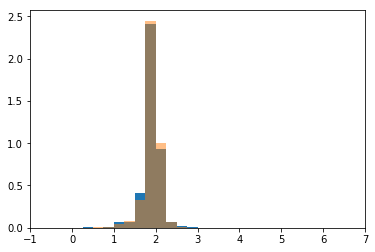

In [24]:
fullEnergy = joinedColumns['Weather Normalized Site EUI (kBtu/ft²)']
fullEnergy = [np.log10(x) for x in fullEnergy if x.is_integer() and x != 0]
pl.hist(fullEnergy, normed = True, bins = [0, .25, .5, .75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3, 3.25, 3.5])

reducedEnergy = reduced['Weather Normalized Site EUI (kBtu/ft²)']
reducedEnergy = [np.log10(x) for x in reducedEnergy]
pl.hist(reducedEnergy, normed = True, bins = [0, .25, .5, .75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3, 3.25, 3.5], alpha = 0.5)
        
pl.xlim(-1, 7)

# 667 and extyra credit
plot a "scatter matrix" of the selected columns. Identify 4 promising "scaling laws" and plot them separately (a scatter plot of column1 vs column2). Does it make sense that there should be a scaling law between the 2 variables? 

which features should be strongly correlated or identical but are not? discuss

([this](https://stackoverflow.com/questions/26975089/making-the-labels-of-the-scatterplot-vertical-and-horizontal-in-pandas) stackoverflow may come in handy)

## all students
At last, from the original dataset remove only the columns that are NaN in the column "Weather Normalized Site EUI (kBtu/ft²)"


In [25]:
joined.shape

(5196, 156)

In [26]:
wnec = "Weather Normalized Site EUI (kBtu/ft²)"
joinedNew = joined[pd.to_numeric(joined[wnec], errors='coerce').notnull()]
joinedNew[wnec] = pd.to_numeric(joinedNew[wnec])
joinedNew.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(4630, 156)

## Analysis: Owner investigation 
### Find owner of the single most energy consuming building

**Find owner of the single most energy consuming building**, as measured by the "Site Weather Normalized EUI per unit area ". 

**Find all the buildings that they own.**


show the weather-normalized site energy consumption and the owner name for the top 30 consuming buildings in Manhattan

In [0]:
owner = joinedNew[joinedNew[wnec] == max(joinedNew[wnec])]['ownername'].values[0]
buildings = sum(joinedNew['ownername'] == owner)

In [28]:
print("Owner of the hisghest consuming building: %s \nThey own %d buildings" % (owner, buildings))

Owner of the hisghest consuming building: ST MARYS HOME FOR GIR 
They own 1 buildings


### Find average building consumption by owner 
For all owners that own more than one building, find the average consumption for buildings owned by the same owner. Your dataframe should have 2 columns called _Weather Normalized Site EUI (kBtu/ft²)_	and _counts_

**Who owns the most energy consuming buildings on average?**

**Who owns the most buildings**

# 667 and EC

Universities are big realtors in NYC. The may own by different names. Find all builgings owned by NYU and COLUMBIA. replace the ownename with NYU and COLUMBIA respectively and re-aggregate the data based on these names and again find the owner of the buildings that pon average consume the most, of the highest number of buildings, and that owns the most sq footage 